Import Libaraies


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

Loading DataSet

In [5]:
sales_data = pd.read_csv('/content/advertising.csv')

In [7]:
sales_data.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [8]:
sales_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


DATA Analysis

In [10]:
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
sns.set_style('whitegrid')
plt.figure(figsize = (20, 8))

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

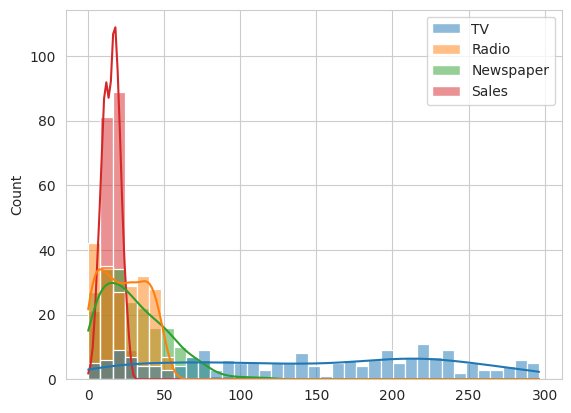

In [12]:
sns.histplot(sales_data, kde= True, color = 'pink')
plt.show()

In [14]:
sales_data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [15]:
correlation = sales_data.corr()

<Axes: >

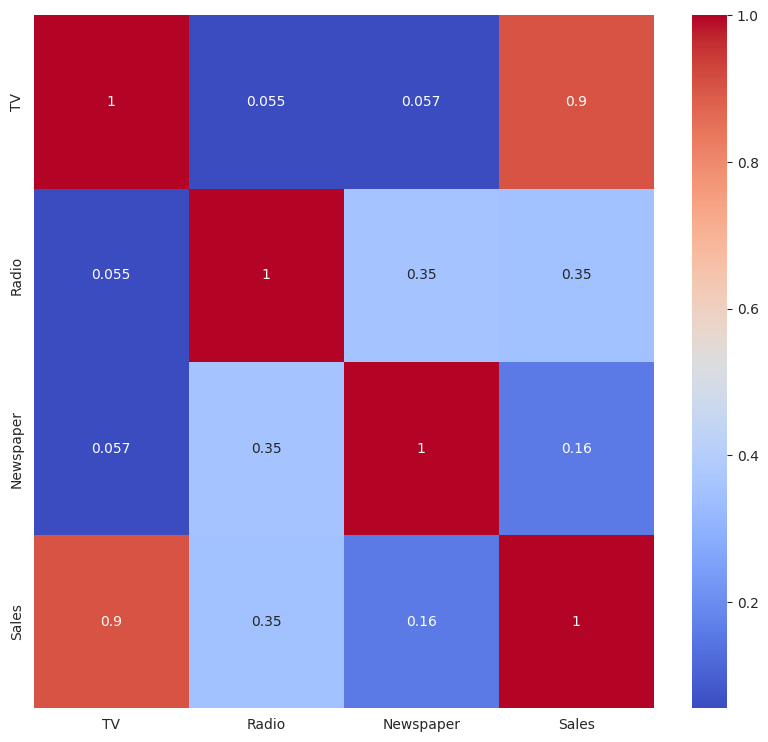

In [16]:
plt.figure(figsize=(10,9))
sns.heatmap(correlation, annot = True, cmap="coolwarm")

Model Buliding

TEST TRAIN SPLIT

In [17]:
X = np.array(sales_data.drop(['Sales'], axis = 1))
Y = np.array(sales_data['Sales'])

In [19]:
X_train , X_test , Y_train, Y_test = train_test_split(X, Y ,test_size = 0.2)

In [20]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

DecisionTreeRegressor Model

In [21]:
sales_predict_model = DecisionTreeRegressor()

model Evalutation

In [22]:
sales_predict_model.fit(X_train, Y_train )

DecisionTreeRegressor()

In [23]:
sales_prediction = sales_predict_model.predict(X_test)

In [24]:
print(sales_prediction)

[10.1 17.6 16.  11.9 20.5 15.  10.4 21.7 20.9 25.4 17.   9.7  9.7 15.
 10.5  9.5 17.  19.8  7.2 26.2 11.9 18.9 10.1 23.8 19.8  9.7 13.7 25.4
 20.  13.3 10.1 13.4 12.9 16.7 17.3 19.6 16.6 12.5  9.7 16.7]


In [27]:
print (f"Accuracy             : {sales_predict_model.score (X_test, sales_prediction)*100}")
print (f"R Squared Error       : {round(metrics.r2_score (Y_test, sales_prediction)*100, 2)}")
print(f"Mean Absolute Error    : {metrics.mean_absolute_error(Y_test,sales_prediction)}")
print(f"Mean_square_error      : {metrics.mean_squared_error(Y_test,sales_prediction)}")
print(f"Root Mean Square Error :{np.sqrt(metrics.mean_squared_error(Y_test, sales_prediction))}")

Accuracy             : 100.0
R Squared Error       : 88.07
Mean Absolute Error    : 1.1475000000000002
Mean_square_error      : 2.8377499999999998
Root Mean Square Error :1.684562257680018


Model Ploting

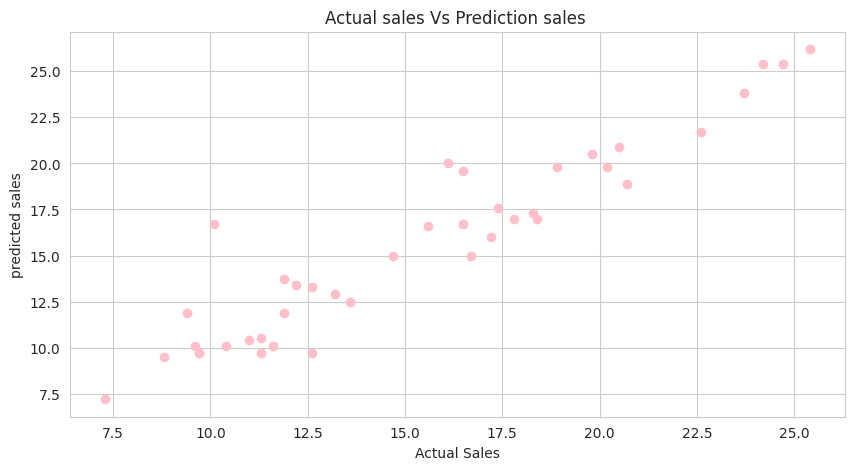

In [26]:
plt.figure(figsize = (10,5))
plt.scatter(Y_test, sales_prediction, color = "pink")
plt.xlabel('Actual Sales')
plt.ylabel('predicted sales')
plt.title("Actual sales Vs Prediction sales ")
plt.show()

model testing prediction

In [28]:
def prediction(input_data):
  data = sales_data.drop('Sales',axis = 1).iloc[input_data]
  data_scaler = scaler.transform(data.values.reshape(-1,3))
  prediction = sales_predict_model.predict(data_scaler)
  print(f"Predicted sales:{prediction[0]}")
  print()

  actual_sales= sales_data.iloc[input_data].Sales
  print(f"Actual sales   :{actual_sales}")
prediction(25)

Predicted sales:17.0

Actual sales   :17.0
